In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/smart-broker-main/smart-broker-main/notebooks


/content/drive/MyDrive/smart-broker-main/smart-broker-main/notebooks


In [3]:
# add parent directory to path: enable import from parent dir
import sys
sys.path.append('../')

from environment import SmartBrokerEnv
from agents.a2c import A2C
from networks.a2c.actor import Actor
from networks.a2c.critic import Critic

import gym
import matplotlib.pyplot as plt
import torch

In [6]:
norm_cols = ['Volume XRP']
cols = ['date'] + ['open', 'high', 'low', 'close', f'Volume XRP']
batch_dur = 15
env = SmartBrokerEnv(
    batch_dur=batch_dur,
    df_info={
        'start_date': '2021-01-01',
        'end_date': '2021-02-01',
        'norm_cols': norm_cols,
        'cols': cols,
    },
    portfolio={

    },
)

actor_model = Actor(
    state_dim=batch_dur*3+3,
    action_dim=3,
)
critic_model = Critic(state_dim=batch_dur*3+3)
a2c = A2C(
    env=env, 
    actor=actor_model,
    critic=critic_model,
    n_actns=3,
    actor_optmz=torch.optim.Adam(actor_model.parameters(), lr=0.001),
    critic_optmz=torch.optim.Adam(critic_model.parameters(), lr=0.001),
    hyprprms={
        'gamma': 0.9995,
    },
    log_freq=1,
    mdl_pth='../models/a2c_nn',
)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
../environment.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['rolling_price'] = self.df[self.price_typ].rolling(self.roll_period).sum()
../environment.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

In [7]:
a2c.run(1000)


Ep: 0 | TS: 19970 | L: 1.114 | R: -6.67 | P: -4.82 | R.Avg P: -4.82 | NW: 95.18 | R.Avg NW: 95.18 | R.U: 247
Ep: 1 | TS: 39940 | L: 0.688 | R: -6.3 | P: 9.67 | R.Avg P: 2.42 | NW: 109.67 | R.Avg NW: 102.43 | R.U: 285
Ep: 2 | TS: 59910 | L: 0.745 | R: -5.61 | P: 16.01 | R.Avg P: 6.95 | NW: 116.01 | R.Avg NW: 106.95 | R.U: 307
Ep: 3 | TS: 79880 | L: 0.972 | R: -5.84 | P: 20.53 | R.Avg P: 10.35 | NW: 120.53 | R.Avg NW: 110.35 | R.U: 321
Ep: 4 | TS: 99850 | L: 1.155 | R: -6.09 | P: 21.22 | R.Avg P: 12.52 | NW: 121.22 | R.Avg NW: 112.52 | R.U: 332
Ep: 5 | TS: 119820 | L: 1.103 | R: -6.35 | P: 12.8 | R.Avg P: 12.57 | NW: 112.8 | R.Avg NW: 112.57 | R.U: 337
Ep: 6 | TS: 139790 | L: 0.942 | R: -6.7 | P: 9.92 | R.Avg P: 12.19 | NW: 109.92 | R.Avg NW: 112.19 | R.U: 338
Ep: 7 | TS: 159760 | L: 0.812 | R: -6.9 | P: 22.62 | R.Avg P: 13.49 | NW: 122.62 | R.Avg NW: 113.49 | R.U: 345
Ep: 8 | TS: 179730 | L: 0.779 | R: -7.18 | P: 15.52 | R.Avg P: 13.72 | NW: 115.52 | R.Avg NW: 113.72 | R.U: 348
Ep: 9 |

KeyboardInterrupt: ignored

In [8]:
a2c.evaluate()

## Visualizations

### Training 

Text(0.5, 1.0, 'Rolling avg balance per episode')

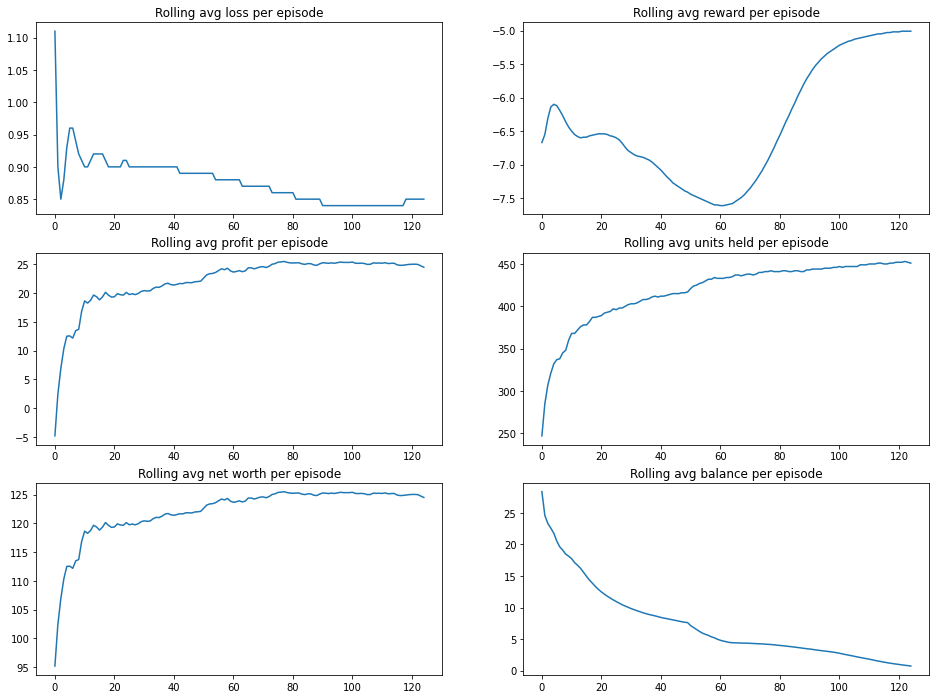

In [9]:
fig, ax = plt.subplots(3, 2, figsize=(16, 12))
r_avg_rewards = []
r_avg_profits = []
r_avg_bal = []
r_avg_units_held = []
r_avg_loss = []
r_avg_net_worth = []
count = 0

for _, log in a2c.logs.items():
    r_avg_rewards.append(log['r_avg_reward'])
    r_avg_profits.append(log['r_avg_profit'])
    r_avg_bal.append(log['r_avg_bal'])
    r_avg_units_held.append(log['r_avg_units_held'])
    r_avg_loss.append(log['r_avg_loss'])
    r_avg_net_worth.append(log['r_avg_net_worth'])
    count += 1

ax[0][0].plot(range(count), r_avg_loss)
ax[0][0].set_title('Rolling avg loss per episode')

ax[0][1].plot(range(count), r_avg_rewards)
ax[0][1].set_title('Rolling avg reward per episode')

ax[1][0].plot(range(count), r_avg_profits)
ax[1][0].set_title('Rolling avg profit per episode')

ax[1][1].plot(range(count), r_avg_units_held)
ax[1][1].set_title('Rolling avg units held per episode')

ax[2][0].plot(range(count), r_avg_net_worth)
ax[2][0].set_title('Rolling avg net worth per episode')

ax[2][1].plot(range(count), r_avg_bal)
ax[2][1].set_title('Rolling avg balance per episode')

### Evaluation

Text(0.5, 1.0, 'Rolling avg balance per episode')

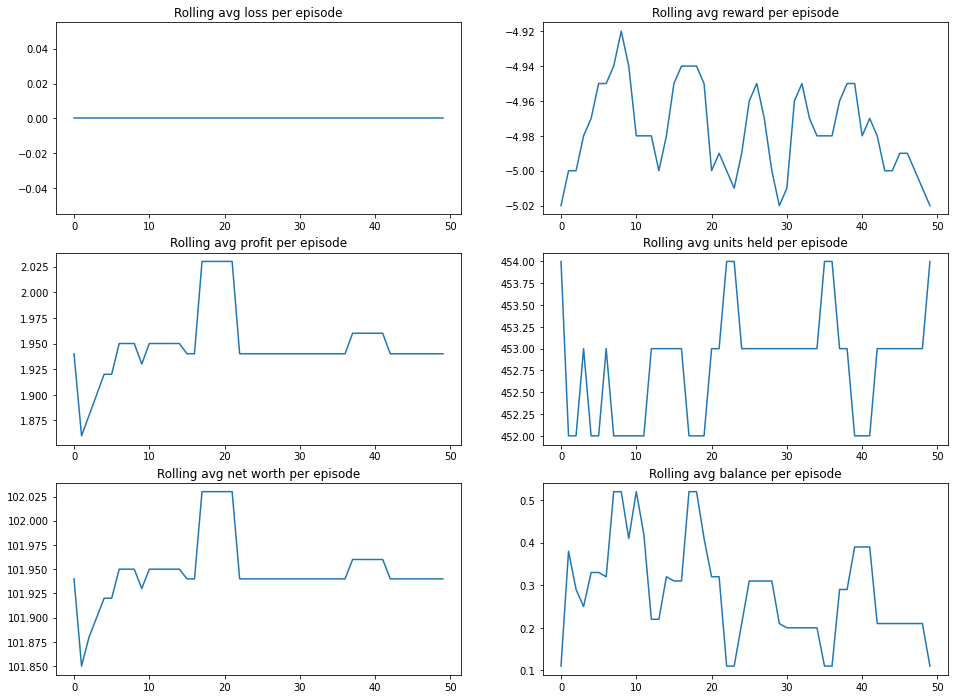

In [10]:
fig, ax = plt.subplots(3, 2, figsize=(16, 12))
r_avg_rewards = []
r_avg_profits = []
r_avg_bal = []
r_avg_units_held = []
r_avg_loss = []
r_avg_net_worth = []
count = 0

for _, log in a2c.eval_logs.items():
    r_avg_rewards.append(log['r_avg_reward'])
    r_avg_profits.append(log['r_avg_profit'])
    r_avg_bal.append(log['r_avg_bal'])
    r_avg_units_held.append(log['r_avg_units_held'])
    r_avg_loss.append(log['r_avg_loss'])
    r_avg_net_worth.append(log['r_avg_net_worth'])
    count += 1

ax[0][0].plot(range(count), r_avg_loss)
ax[0][0].set_title('Rolling avg loss per episode')

ax[0][1].plot(range(count), r_avg_rewards)
ax[0][1].set_title('Rolling avg reward per episode')

ax[1][0].plot(range(count), r_avg_profits)
ax[1][0].set_title('Rolling avg profit per episode')

ax[1][1].plot(range(count), r_avg_units_held)
ax[1][1].set_title('Rolling avg units held per episode')

ax[2][0].plot(range(count), r_avg_net_worth)
ax[2][0].set_title('Rolling avg net worth per episode')

ax[2][1].plot(range(count), r_avg_bal)
ax[2][1].set_title('Rolling avg balance per episode')

In [ ]:
# import pickle
# with open("../pickles/a2c_logs.pickle","wb") as f:
#     pickle.dump(temp, f, pickle.HIGHEST_PROTOCOL)